In [141]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
from scipy.stats import poisson

Threshold = 154
sigma of threshold =  5.057503505878237


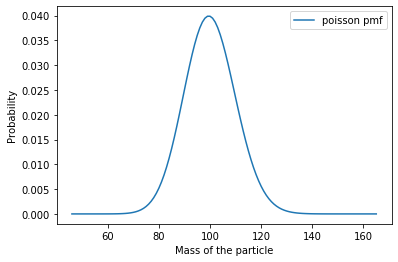

In [142]:
# Problem 1
mu = 100
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.000000001, mu),poisson.ppf(0.999999999, mu))
ax.plot(x, poisson.pmf(x, mu), label='poisson pmf')
plt.ylabel('Probability')
plt.xlabel('Mass of the particle')
plt.legend()

threshold = stats.poisson.isf(stats.norm.sf(5),100)
print('Threshold = 154')
ptest = poisson.cdf(threshold, mu)
sig = stats.norm.ppf(ptest)
print('sigma of threshold = ', sig)

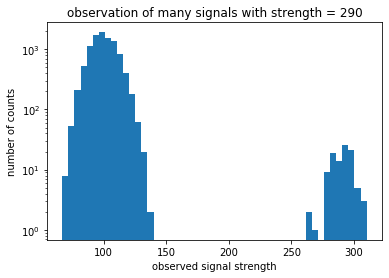

In [143]:
# Problem 2
# Part a
val = 190
num = 100
numdata = 10000
injected = np.append(np.zeros(numdata), np.ones(num)*190)
data = stats.poisson.rvs(100, size = 10100)
observe = injected + data
fig, ax = plt.subplots(1,1)
plt.hist(observe, bins=50)
plt.yscale('Log')
plt.xlabel('observed signal strength')
plt.ylabel('number of counts')
plt.title('observation of many signals with strength = 290')
plt.show()


The observed signal which appeared to be a cluster of data shown on the right side of the histogram, which shows the signal that I injected with value of 190 plus the background value. The injected values turned out to be a range of data due to the noise of the background. Even if the signal strength is constant, we observe a range of measurements. The observed signal is symmetric and biased, the observed signal is centered at 290, and the injected signal has a strength of 190. The observed signal is stronger than the true injected signal.

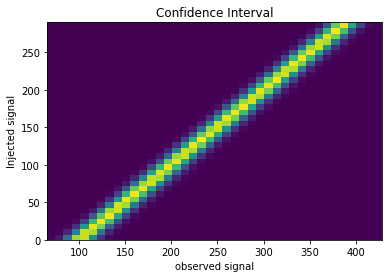

In [144]:
# Problem 3
numdata = 1000000
noise = stats.poisson.rvs(100, size = numdata)
inject3 = np.linspace(0,290,numdata)
observe = noise + inject3
plt.hist2d(observe, inject3, 40)
plt.xlabel('observed signal')
plt.ylabel('Injected signal')
plt.title('Confidence Interval')
plt.show()

As shown in the 2D histogram, the observed signal is brightest at 290 when injected signal is 190. This is consistent with the histogram that I made in problem 2.

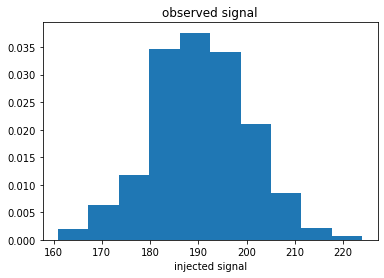

In [145]:
obs = 290
injected3 = inject3[np.abs(observe-obs) < 0.1]
plt.hist(injected3, 10, density = True)
plt.xlabel('injected signal')
plt.title('observed signal')
plt.show()

In [146]:
sig1 = stats.poisson.isf(stats.norm.sf(1), np.mean(injected))
print('This gives a 1 sigma uncertainty of ', sig1, ' on the true signal strength')

This gives a 1 sigma uncertainty of  3.0  on the true signal strength


The injected signal is biased because it's less than the observed signal and it's symmetric because the distribution looks even with the mean of 190. The 2d histogram shows that slicing along either the observed or injected signals will give a similar histogram.

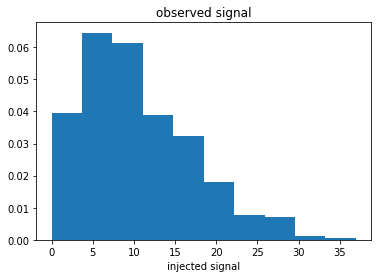

In [147]:
#Problem 4
# 1 sigma of 100 is 105
obs4 = 105
inject4 = inject3[np.abs(observe-obs4) < 0.1]
plt.hist(inject4, density = True)
plt.xlabel('injected signal')
plt.title('observed signal')
plt.show()

For this sigma signal, the injected signal has a high chance of being 0 because the observed signal is biased by 100 counts above the injected signal. The injected signal is about 100 counts lower when near the average of 100, so the distribution is clustered around 0.

In [151]:
mean = np.mean(inject4)
value = stats.poisson.ppf(0.95,mean)
print('one observation of candidate signal is 105, would result in the true signal being less than', value, '95% of the time')

one observation of candidate signal is 105, would result in the true signal being less than 16.0 95% of the time
